<a href="https://colab.research.google.com/github/RaffaeleBini/RaffaeleBini/blob/main/ProgettoPandasRaffaele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEMA**

In questo dataset troverai 130mila recensioni di vini, di cui vengono indicati varietà, provenienza, vigna, prezzo e descrizione.
Immagina ora di voler creare un marketplace di vini per mettere in contatto i piccoli produttori locali con acquirenti da tutto il mondo. 
Potresti provare a capire quali sono le varietà e le vigne più apprezzate, se ci sono outlier di prezzo, se c’è correlazione tra le variabili. 
Un possibile output del tuo lavoro potrebbe essere la proposta di una strategia per l’assortimento da cui partire per il marketplace di vino che vorresti creare. Ma prima assicurati di aver esplorato i dati a fondo e di mostrare i tuoi ragionamenti.

Per iniziare, importo numpy, Pandas, Seaborn e matplotlib; successivamente, uso la funzione read_csv per importare i dati e creare il mio DataFrame. Con la funzione shape, controllo le dimensioni del DataFrame.

In [1]:
#importo numpy, Pandas, Seaborn e matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

"C:\Users\rbini\Documents\Personale\DB\ProgettoPandas\winemag-data-130k-v2.csv"
/content/ProgettoPandas/winemag-data-130k-v2.csv

In [3]:
#Creo un dataframe importando il file csv
df1 = pd.read_csv("/content/ProgettoPandas/winemag-data-130k-v2.csv")

In [4]:
#uso la funzione shape per vedere le dimensioni del dataframe
df1.shape

(95319, 14)

Inizio fare una prima esplorazione del DataFrame: uso la funzione head per iniziare a vedere cosa contienee farmi una prima idea dei dati scorrendo i titoli delle colonne

In [5]:
#uso la funzione head per iniziare a vedere cosa contiene il dataframe e farmi una prima idea dei dati scorrendo i titoli delle colonne
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Procedo a ricercare informazioni più dettagliate sui dati contenuti nelle 14 colonne, usando la funzione info: analizzo il dataframe per vedere le tipologie di dati, i valori nulli e la consistenza dei dati stessi, al fine di individuare eventuali "rumori" da rimuovere. L'idea è quella di cercare possibili semplificazioni eliminando informazioni incomplete, non consistenti o superflue.

In [6]:
#analizzo il dataframe per vedere le tipologie di dati, i valori nulli e la consistenza dei dati stessi, al fine di individuare eventuali "rumori" da rimuovere
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95319 entries, 0 to 95318
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             95319 non-null  int64  
 1   country                95274 non-null  object 
 2   description            95319 non-null  object 
 3   designation            67858 non-null  object 
 4   points                 95319 non-null  int64  
 5   price                  88672 non-null  float64
 6   province               95274 non-null  object 
 7   region_1               79660 non-null  object 
 8   region_2               36706 non-null  object 
 9   taster_name            75928 non-null  object 
 10  taster_twitter_handle  72365 non-null  object 
 11  title                  95318 non-null  object 
 12  variety                95317 non-null  object 
 13  winery                 95318 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 10.2

Non tutti i dati sono consistenti, per alcune colonne ci sono valori mancanti: i valori di region_2 sono meno della metà degli altri, questo fa pensare ad un dato opzionale o non esaustivo.
Per le finalità dell'analisi, inoltre, le due colonne region 1 e region 2 e le due colonne relative ai taster sono, a mio avviso, non rilevanti; anche la descrizione del taste non è, secondo me, rilevante in prima battuta.
Ipotizzo già di eliminare le suddette colonne, per semplificare il dataframe e centrare l'analisi su aspetti focalizzati su punteggio di valutazione, costi e tipologia di vini.

Ipotizzo già alcune idee:
- verificare la correlazione tra prezzo e valutazione
- verificare la correlazione tra varietà e valutazione
- verificare la correlazione tra vineria e valutazione

Questo per vedere se la valutazione sia influenzata da prezzo, varietà e vineria. In altre parole, tengo la valutazione come parametro guida e vado a cercare di individuare delle fasce di prezzo e delle categorie di vino da consigliare.


Sempre nell'ottica di consistenza dei dati, verifico anche che non ci siano righe duplicate.

In [7]:
#verifico che non ci siano righe duplicate
df1.duplicated().sum()

0

Procedo nell'analisi di consistenza e sostituisco i campi vuoti con un valore null per uniformare il dataframe e intercettare eventuali ulteriori duplicati. Quindi verifico la presenza di valori nulli nelle singole colonne: se dovessero essercene molti, potrei semplificare il DataFrame eliminando le colonne con pochi dati significativi.

In [8]:
#sostituisco i campi vuoti con un valore null per uniformare il dataframe e intercettare eventuali duplicati
df1.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [9]:
#vado a vedere quanti valori nulli ci sono nelle varie colonne

totalnull = df1.isnull().sum().sort_values(ascending=False)
totalnull

region_2                 58613
designation              27461
taster_twitter_handle    22954
taster_name              19391
region_1                 15659
price                     6647
country                     45
province                    45
variety                      2
title                        1
winery                       1
Unnamed: 0                   0
description                  0
points                       0
dtype: int64

Il risultato mi porta a confermare la scelta di eliminare le colonne region_2, region_1, designation e le due colonne dei taster
Il fatto di avere 8996 righe senza prezzo è un problema. Proverò poi a vedere se ci sono correlazioni che si possano sfruttare per dedurre un prezzo; preferirei, infatti, non mettere prezzi medi che potrebbero, in questo contesto, non essere indicativi.

In [10]:
#elimino le colonne che non mi servono
df1 = df1.drop(['region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)
#df1 = df1.drop(['region_2'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95319 entries, 0 to 95318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   95319 non-null  int64  
 1   country      95274 non-null  object 
 2   description  95319 non-null  object 
 3   points       95319 non-null  int64  
 4   price        88672 non-null  float64
 5   province     95274 non-null  object 
 6   title        95318 non-null  object 
 7   variety      95317 non-null  object 
 8   winery       95318 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.5+ MB


Adesso che ho semplificato e reso più consistente il DataFrame, inizio a valutare le relazioni tra le variabili ed utilizzo una matrice di correlazione. 

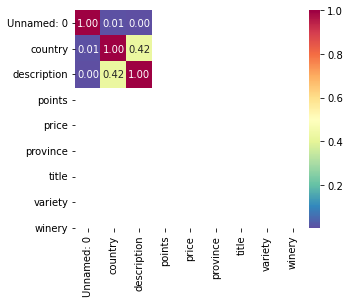

In [11]:
matcor1 = df1.corr()
hm = sns.heatmap(matcor1, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df1.columns, 
                 xticklabels=df1.columns, 
                 cmap="Spectral_r")
plt.show()

In realtà vedo subito che non ha senso includere la colonna unnamed nella analisi; ovviamente, tra le variabili qualitative non vi è correlazione nella matrice.

Vado più nel dettaglio su Valutazione e Prezzo e mi creo un DataFrame con queste due variabili; uso la funzione describe per ottenere un quadro sul range delle due variabili, sulla distribuzione e la variabilità.

In [12]:
df2 = df1[['points', 'price']]
df2.describe()

,points,price
count,95319.000000,88672.000000
mean,88.452449,35.321466
std,3.016065,40.387129
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


Per la valutazione (points) il range oscilla tra 80 e 100 e la deviazione standard è bassa; la media è leggermente superiore al secondo quartile, il che mi fa pensare ad una distribuzione quasi simmetrica. 
Per il prezzo, invece, i valori oscillano in un range elevato tra 4 e 3300 (infatti la deviazione standard è elevata) e la media è più vicina al terzo quartile che al secondo: questo mi fa pensare ad una distribuzione non simmetrica. 
Confrontando questi dati tra valutazioni e prezzi, la prima cosa che mi viene da pensare è che probabilmente vi sono vini di prezzo contenuto con valutazione alta, mi aspetto di non trovare una relazione di linearità tra le due variabili. In altre parole, non è detto che un vino più caro sia migliore di uno che costa poco.

Per verificare questa ipotesi, uso un grafico di dispersione (scatter plot) per vedere come si relazionano prezzo e valutazione.

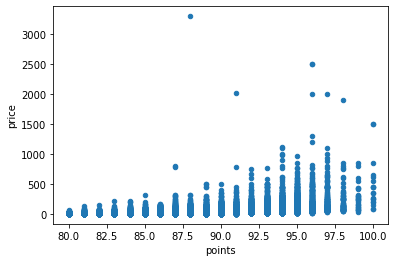

In [ ]:
df2.plot(kind='scatter', x='points', y='price')

Il grafico conferma che non c'è una relazione di dipendenza lineare tra prezzo e valutazione. Mi sembra interessante vedere che già nella fascia di prezzo sotto i 250 ci sono vini con le valutazioni più alte.

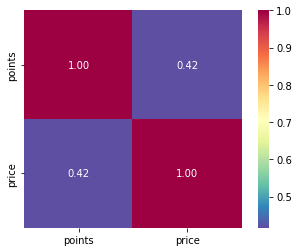

In [ ]:
matcor2 = df2.corr()
hm = sns.heatmap(matcor2, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df2.columns, 
                 xticklabels=df2.columns, 
                 cmap="Spectral_r")
plt.show()

Un altro strumento utile per verificare le correlazioni e le distribuzioni è il pairplot di seaborn: avendo poche variabili, vado a provarlo.

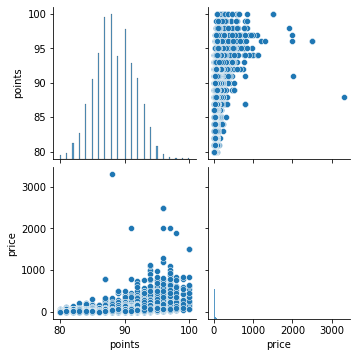

In [ ]:
sns.pairplot(df2)

Dal pairplot ho conferma che non c'è relazione lineare tra le due variabili e vedo che le valutazioni hanno una distribuzione abbastanza centrata e normale.

Vedo anche che ci sono degli outlayers nei prezzi (uno va oltre i 3'000). Vista la distribuzione delle valutazioni rispetto ai prezzi, ritengo possibile avere un ottimo assortimento anche se non si considerano gli outlayers.

Adesso vado a prendere in esame la Varietà del vino: estraggo in un nuovo dataframe la colonna variety e in altre due colonne le relative medie di points e price.

In [13]:
df3 = df1.groupby('variety').agg({"points":"mean", "price":"mean"})
df3.sort_values(by=["points", "price"], ascending = False, inplace = True)
df3

,points,price
variety,,
Terrantez,95.00,236.0
Gelber Traminer,95.00,35.0
Bual,94.25,129.0
Tinta del Pais,94.00,45.0
Riesling-Chardonnay,94.00,40.0
...,...,...
Asprinio,83.00,NaN
Aidani,82.00,27.0
Airen,81.50,8.5


Ripeto la stessa cosa con le Vinerie.

In [14]:
df4 = df1.groupby('winery').agg({"points":"mean", "price":"mean"})
df4.sort_values(by=["points", "price"], ascending = False, inplace = True)
df4.head(20)

,points,price
winery,,
Clos de Tart,98.000000,319.000000
Araujo,98.000000,275.000000
Salon,96.800000,380.600000
Tenuta dell'Ornellaia,96.700000,286.500000
Château Pétrus,96.666667,2250.000000
Domaine des Lambrays,96.333333,215.000000
Barons de Rothschild,96.000000,390.000000
Domaine Jean Grivot,96.000000,281.000000
Patrimony,96.000000,275.000000


Nell'ottica di creare un marketplace, ritengo più opportuno un approccio per Vineria piuttosto che per varietà di vino, selezionando magari alcune vinerie con cui collaborare ed andando poi a definire le varietà all'interno delle vinerie selezionate.

Per esempio, si potrebbero selezionare 3 categorie per prezzo (sotto i 50, tra 50 e 100, tra 100 e 200) e per ciascuna categoria individuare le 2 vinerie con punteggio migliore.

In [15]:
df4 = df1.groupby('winery').agg({"points":"mean", "price":"mean"})
df4.sort_values(by=["points", "price"], ascending = False, inplace = True)
df4[df4['price'] <= 50]

,points,price
winery,,
Copain Wines,95.00,50.0
Schloss Schönborn,95.00,45.0
Julien Schaal,94.75,32.5
Château Clos Haut-Peyraguey,94.25,45.0
Jean Biecher & Fils,94.25,45.0
...,...,...
TorresManur,80.00,9.0
Viña Cantosán,80.00,9.0
Bodegas del Mundo,80.00,8.0


In questa fascia di prezzo, si potrebbero mettere in assortimento Copain Wines, Nicolaysen Family Vineyards e Scaggs Vineyard.

In [16]:
df4[(df4['price'] > 50) & (df4['price'] <= 100) ]

,points,price
winery,,
Lewis,96.000000,60.0
Dolce,95.500000,82.5
Domaine Huët,95.111111,61.0
DAOU,95.000000,100.0
Eugenio Bocchino,95.000000,100.0
...,...,...
iNapa Wine,83.000000,80.0
Adrian Fog,83.000000,75.0
Antier,83.000000,70.0


In questa fascia: Semper, D'alfonso-Curran e Lewis.

In [17]:
df4[(df4['price'] > 100) & (df4['price'] <= 200) ]

,points,price
winery,,
Crown Point,96.000000,185.000000
Château Léoville Barton,95.800000,105.000000
Wayfarer,95.470588,111.470588
Continuum,95.000000,182.500000
Staglin,94.666667,163.333333
...,...,...
Condado de Haza,86.000000,103.000000
Delectus,85.800000,108.600000
Nathaniel Rose,85.200000,100.600000


Infine, per la fascia tra 100 e 200 di prezzo, prendere Ovid, Gandona e J.L. Chave.

Un'altra strategia potrebbe essere di considerare tutte le Vinerie e rispettive Varietà con punteggio superiore a 96 e prezzo medio inferiore a 150

In [45]:
df_points = df1['points']>=96
df_price = df1['price']<150
df5 = df1[df_points & df_price]
df5

,Unnamed: 0,country,description,points,price,province,title,variety,winery
348,348,Australia,Deep mahogany. Dried fig and black tea on the ...,97,100.0,Victoria,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards
352,352,US,Citrus-kissed saltiness lies at the core of th...,96,68.0,California,Rochioli 2014 South River Chardonnay (Russian ...,Chardonnay,Rochioli
355,355,US,A waft of smoky char and toasty oak provide a ...,96,68.0,California,Rochioli 2014 Sweetwater Chardonnay (Russian R...,Chardonnay,Rochioli
1556,1556,US,The flagship wine from Quilceda Creek offers e...,99,125.0,Washington,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek
1557,1557,US,"A stupendous Pinot Noir, showing how beautiful...",99,94.0,California,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem
...,...,...,...,...,...,...,...,...,...
90942,90942,US,"This is rich and appealing, vast in flavor and...",96,75.0,California,Goldschmidt 2008 Single Vineyard Selection Gam...,Cabernet Sauvignon,Goldschmidt
91841,91841,US,"Wow. Juicy, expansive and effusive, this wine ...",96,68.0,California,Venge 2013 Oakville Estate Vineyard Merlot (Oa...,Merlot,Venge
92451,92451,US,The 2005 Leonetti Reserve is all estate vineya...,97,125.0,Washington,Leonetti Cellar 2005 Reserve Red Wine Red (Wal...,Red Blend,Leonetti Cellar
93691,93691,US,"An awesome rosé, just a tremendous feat. Made ...",98,130.0,California,Schramsberg 2004 J. Schram Rosé Sparkling (Nor...,Sparkling Blend,Schramsberg


Si ottiene un elenco di 338 vini, che potrebbero costituire l'assortimento per il Market Place.